In [22]:
import numpy as np

# --- Data ---
X = np.array([[0.6, 0.2, 0.9]])
y_true = np.array([[1.0, 0.0]])

# --- Initialize weights and biases ---
W = np.random.randn(3, 2)
b = np.random.randn(1, 2)
lr = 0.1

# --- Activation functions and their derivatives ---
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# --- Forward function (with activation) ---
def forward(X, W, b, activation):
    z = np.dot(X, W) + b
    if activation == "relu":
        return relu(z), z
    elif activation == "sigmoid":
        return sigmoid(z), z

# --- Training loop ---
losses = []
for epoch in range(30):
    # Forward pass
    y_pred, z = forward(X, W, b, activation="sigmoid")
    loss = np.mean((y_true - y_pred) ** 2)
    losses.append(loss)
    
    print("z:", z)
    print("y_pred:", y_pred)

    # Backward pass
    dL_dy = 2 * (y_pred - y_true)
    dy_dz = relu_derivative(z)
    dL_dz = dL_dy * dy_dz

    dL_dW = np.dot(X.T, dL_dz)
    dL_db = dL_dz

    W -= lr * dL_dW
    b -= lr * dL_db

    print(f"Epoch {epoch+1:02d}: loss={loss:.4f}")

print("\nFinal predictions:", y_pred)


z: [[ 0.85203968 -0.43218253]]
y_pred: [[0.70099484 0.39360528]]
Epoch 01: loss=0.1222
z: [[ 0.98419996 -0.43218253]]
y_pred: [[0.72794079 0.39360528]]
Epoch 02: loss=0.1145
z: [[ 1.10445014 -0.43218253]]
y_pred: [[0.751093   0.39360528]]
Epoch 03: loss=0.1084
z: [[ 1.21446703 -0.43218253]]
y_pred: [[0.77108838 0.39360528]]
Epoch 04: loss=0.1037
z: [[ 1.31564597 -0.43218253]]
y_pred: [[0.7884564  0.39360528]]
Epoch 05: loss=0.0998
z: [[ 1.40914824 -0.43218253]]
y_pred: [[0.80363156 0.39360528]]
Epoch 06: loss=0.0967
z: [[ 1.49594309 -0.43218253]]
y_pred: [[0.81696862 0.39360528]]
Epoch 07: loss=0.0942
z: [[ 1.57684296 -0.43218253]]
y_pred: [[0.82875694 0.39360528]]
Epoch 08: loss=0.0921
z: [[ 1.65253239 -0.43218253]]
y_pred: [[0.83923302 0.39360528]]
Epoch 09: loss=0.0904
z: [[ 1.7235914  -0.43218253]]
y_pred: [[0.84859085 0.39360528]]
Epoch 10: loss=0.0889
z: [[ 1.79051424 -0.43218253]]
y_pred: [[0.85699031 0.39360528]]
Epoch 11: loss=0.0877
z: [[ 1.85372452 -0.43218253]]
y_pred: [[0.

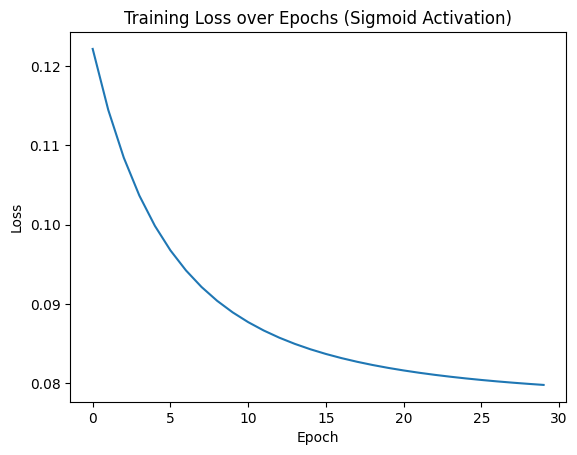

In [23]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss over Epochs (Sigmoid Activation)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


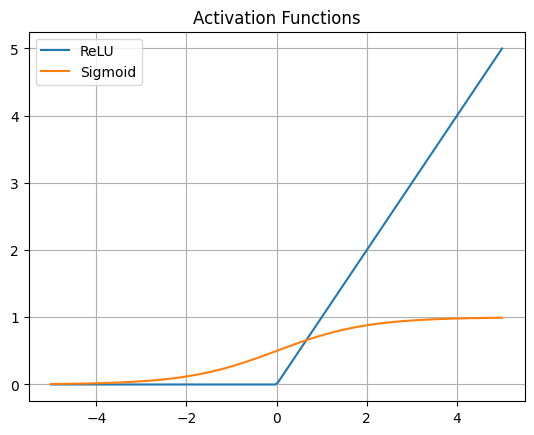

In [24]:
xs = np.linspace(-5, 5, 200)
plt.plot(xs, np.maximum(0, xs), label="ReLU")
plt.plot(xs, 1 / (1 + np.exp(-xs)), label="Sigmoid")
plt.legend()
plt.title("Activation Functions")
plt.grid(True)
plt.show()
